In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('OCD Patient Dataset_ Demographics & Clinical Data.csv')

In [ ]:
data.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [ ]:
data.describe()

,Patient ID,Age,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,5541.254000,46.781333,121.745333,20.048000,19.62600
std,2562.389469,16.830321,67.404610,11.823884,11.78287
min,1017.000000,18.000000,6.000000,0.000000,0.00000
25%,3338.000000,32.000000,64.000000,10.000000,9.00000
50%,5539.500000,47.000000,121.000000,20.000000,20.00000
75%,7745.500000,61.000000,178.000000,31.000000,29.00000
max,9995.000000,75.000000,240.000000,40.000000,40.00000


In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age,0
Gender,0
Ethnicity,0
Marital Status,0
Education Level,0
OCD Diagnosis Date,0
Duration of Symptoms (months),0
Previous Diagnoses,248
Family History of OCD,0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
imputer = SimpleImputer(strategy='most_frequent')
data['Medications'] = imputer.fit_transform(data[["Medications"]]).ravel()
data["Previous Diagnoses"] = imputer.fit_transform(data[["Previous Diagnoses"]]).ravel()

In [ ]:
data = data.drop(columns=['OCD Diagnosis Date'])

In [ ]:
categorical_columns = ['Gender', 'Ethnicity', 'Marital Status', 'Education Level','Previous Diagnoses',
                       'Family History of OCD', 'Obsession Type', 'Compulsion Type',
                       'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications']

In [ ]:
for column in categorical_columns:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])

In [ ]:
data

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,0,0,2,3,203,1,0,1,0,17,10,1,1,1
1,2406,69,1,0,0,3,180,1,1,1,4,21,25,1,1,2
2,1188,57,1,3,0,0,173,1,0,0,0,3,4,0,0,0
3,6200,27,0,3,1,0,126,2,1,4,4,14,28,1,1,2
4,5824,56,0,3,1,2,168,2,1,2,2,39,18,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,1,3,0,0,53,1,0,0,4,21,33,1,1,2
1496,5013,19,0,3,0,1,160,0,1,2,3,25,16,1,1,2
1497,6089,40,1,1,1,3,100,1,1,0,1,2,15,1,1,0
1498,3808,37,0,2,1,3,210,0,1,0,4,16,7,1,0,0


In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age,0
Gender,0
Ethnicity,0
Marital Status,0
Education Level,0
Duration of Symptoms (months),0
Previous Diagnoses,0
Family History of OCD,0
Obsession Type,0


In [ ]:
counts = data['Gender'].value_counts()
print(counts)

Gender
1    753
0    747
Name: count, dtype: int64


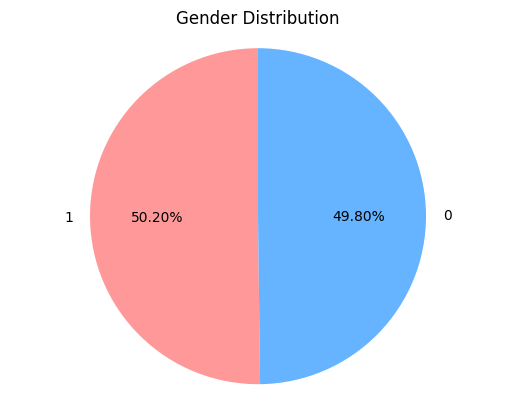

In [ ]:
colors = ['#ff9999','#66b3ff']
plt.pie(counts,labels = counts.index, autopct='%1.2f%%',colors=colors,startangle=90)
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()

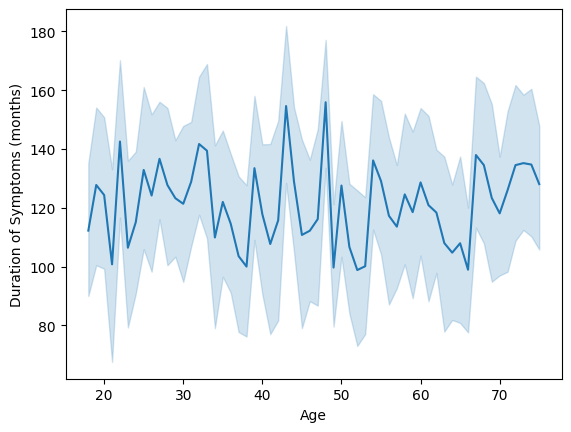

In [ ]:
sns.lineplot(y = "Duration of Symptoms (months)",x = "Age", data=data)
plt.show()

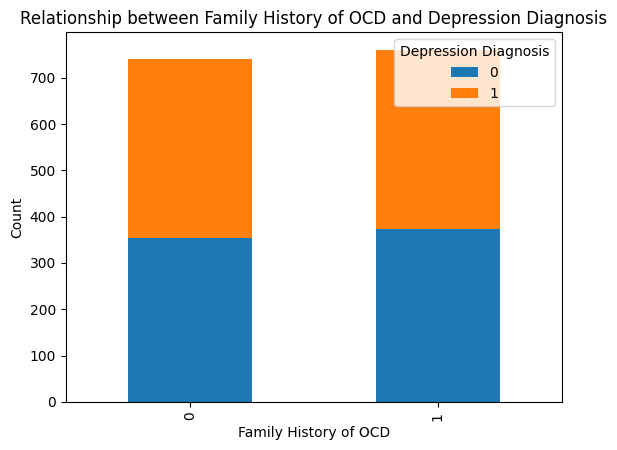

In [ ]:
grouped_data = data.groupby(['Family History of OCD', 'Depression Diagnosis'])['Family History of OCD'].count().unstack()
grouped_data.plot(kind='bar', stacked=True)
plt.title('Relationship between Family History of OCD and Depression Diagnosis')
plt.xlabel('Family History of OCD')
plt.ylabel('Count')
plt.legend(title='Depression Diagnosis')
plt.show()

<ipython-input-337-11d6c1558b96>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Ethnicity", y = "Age", data = data, palette="pastel")


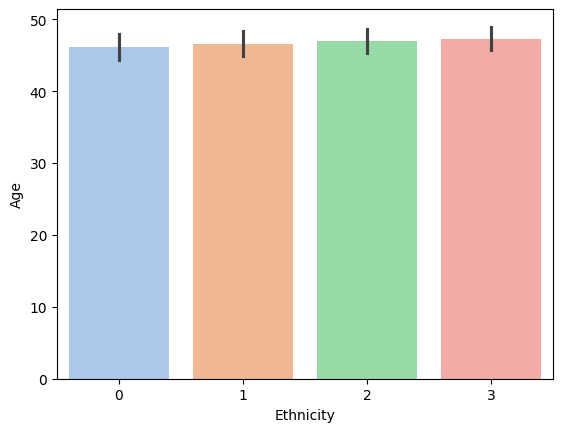

In [ ]:
sns.barplot(x = "Ethnicity", y = "Age", data = data, palette="pastel")
plt.show()

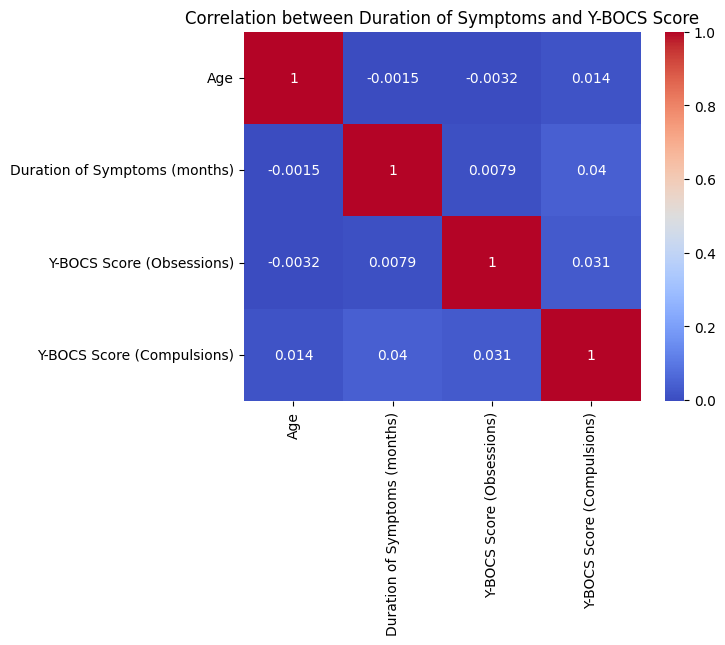

In [ ]:
correlation = data[["Age","Duration of Symptoms (months)", "Y-BOCS Score (Obsessions)","Y-BOCS Score (Compulsions)"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation between Duration of Symptoms and Y-BOCS Score")
plt.show()

<ipython-input-339-5801b19f8594>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data["Compulsion Type"],palette="bright")


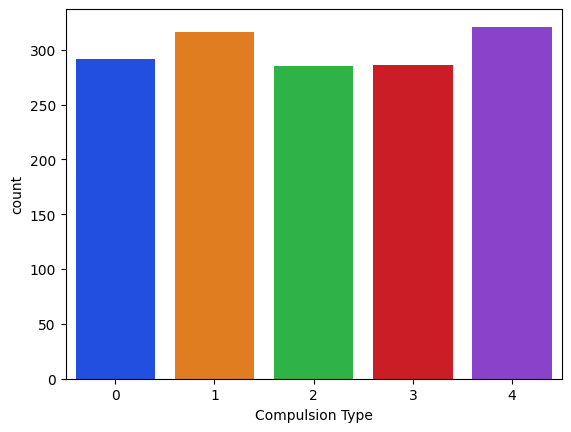

In [ ]:
sns.countplot(x = data["Compulsion Type"],palette="bright")
plt.show()

In [ ]:
data.columns

Index(['Patient ID', 'Age', 'Gender', 'Ethnicity', 'Marital Status',
       'Education Level', 'Duration of Symptoms (months)',
       'Previous Diagnoses', 'Family History of OCD', 'Obsession Type',
       'Compulsion Type', 'Y-BOCS Score (Obsessions)',
       'Y-BOCS Score (Compulsions)', 'Depression Diagnosis',
       'Anxiety Diagnosis', 'Medications'],
      dtype='object')

In [ ]:
x = data.drop(columns=['Medications'])
y = data['Medications']

In [ ]:
scaler = MinMaxScaler()
numerical_columns = ['Age', 'Duration of Symptoms (months)', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']
x[numerical_columns] = scaler.fit_transform(x[numerical_columns])

In [ ]:
x.shape

(1500, 15)

In [ ]:
y.shape

(1500,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = model.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
accuracy = accuracy_score(ytest,predictions)
print(accuracy)
print(confusion_matrix(ytest, predictions))
print(classification_report(ytest, predictions))

0.5066666666666667
[[152   0   0]
 [ 74   0   0]
 [ 74   0   0]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       152
           1       0.00      0.00      0.00        74
           2       0.00      0.00      0.00        74

    accuracy                           0.51       300
   macro avg       0.17      0.33      0.22       300
weighted avg       0.26      0.51      0.34       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(xtrain, ytrain)

# Predictions and Evaluation
rf_predictions = rf_model.predict(xtest)
print("Random Forest Accuracy:", accuracy_score(ytest, rf_predictions))
print(confusion_matrix(ytest, rf_predictions))
print(classification_report(ytest, rf_predictions))

Random Forest Accuracy: 0.5066666666666667
[[145   6   1]
 [ 67   5   2]
 [ 69   3   2]]
              precision    recall  f1-score   support

           0       0.52      0.95      0.67       152
           1       0.36      0.07      0.11        74
           2       0.40      0.03      0.05        74

    accuracy                           0.51       300
   macro avg       0.42      0.35      0.28       300
weighted avg       0.45      0.51      0.38       300



In [ ]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [ ]:
# Predictions and Evaluation
gb_predictions = gb_model.predict(xtest)
print("Gradient Boosting Accuracy:", accuracy_score(ytest, gb_predictions))
print(confusion_matrix(ytest, gb_predictions))
print(classification_report(ytest, gb_predictions))

Gradient Boosting Accuracy: 0.49666666666666665
[[136  12   4]
 [ 61  10   3]
 [ 64   7   3]]
              precision    recall  f1-score   support

           0       0.52      0.89      0.66       152
           1       0.34      0.14      0.19        74
           2       0.30      0.04      0.07        74

    accuracy                           0.50       300
   macro avg       0.39      0.36      0.31       300
weighted avg       0.42      0.50      0.40       300



In [ ]:
# Support Vector Classifier
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(xtrain, ytrain)

SVC()

In [ ]:
# Predictions and Evaluation
svc_predictions = svc_model.predict(xtest)
print("SVC Accuracy:", accuracy_score(ytest, svc_predictions))
print(confusion_matrix(ytest, svc_predictions))
print(classification_report(ytest, svc_predictions))

SVC Accuracy: 0.5066666666666667
[[152   0   0]
 [ 74   0   0]
 [ 74   0   0]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       152
           1       0.00      0.00      0.00        74
           2       0.00      0.00      0.00        74

    accuracy                           0.51       300
   macro avg       0.17      0.33      0.22       300
weighted avg       0.26      0.51      0.34       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# XGBoost Classifier
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(xtrain, ytrain)

# Predictions and Evaluation
xgb_predictions = xgb_model.predict(xtest)
print("XGBoost Accuracy:", accuracy_score(ytest, xgb_predictions))
print(confusion_matrix(ytest, xgb_predictions))
print(classification_report(ytest, xgb_predictions))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:39:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.43333333333333335
[[108  24  20]
 [ 54  13   7]
 [ 51  14   9]]
              precision    recall  f1-score   support

           0       0.51      0.71      0.59       152
           1       0.25      0.18      0.21        74
           2       0.25      0.12      0.16        74

    accuracy                           0.43       300
   macro avg       0.34      0.34      0.32       300
weighted avg       0.38      0.43      0.39       300

